# Flight Price Prediction

In [1]:
#Impoting libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading train data
train_df=pd.read_excel('Data_Train.xlsx')

In [3]:
#reading test data
test_df=pd.read_excel('Test_set.xlsx')

In [4]:
train_df.shape

(10683, 11)

In [5]:
test_df.shape

(2671, 10)

In [6]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [8]:
##appending test and train data
df=train_df.append(test_df,sort=False)

In [10]:
df.shape

(13354, 11)

In [11]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [12]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

# Feature Engineering

In [13]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [14]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [16]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [17]:
df[['Date','Month','Year']]=df[['Date','Month','Year']].astype(int)

In [18]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [19]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [20]:
df['Arrival_Time']

0       01:10 22 Mar
1              13:15
2       04:25 10 Jun
3              23:30
4              21:35
            ...     
2666    20:25 07 Jun
2667           16:55
2668    04:25 07 Mar
2669           19:15
2670           19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [21]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [22]:
df['Arrival_Time'].head()

0    01:10
1    13:15
2    04:25
3    23:30
4    21:35
Name: Arrival_Time, dtype: object

In [23]:
df['Arrival_Hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minutes']=df['Arrival_Time'].str.split(':').str[1]

In [24]:
df.drop(['Arrival_Time'],inplace=True,axis=1)

In [25]:
df['Dep_Hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_Minutes']=df['Dep_Time'].str.split(':').str[1]

In [26]:
df.drop(['Dep_Time'],inplace=True,axis=1)

In [27]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Dep_Hour,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,04,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [28]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [29]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Dep_Hour,Dep_Minutes
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,09,25,09,45


In [30]:
df['Total_Stops'].fillna('1 stop',inplace=True)

In [31]:
df['Total_Stops'].isnull().sum()

0

In [32]:
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0 stop')

In [33]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Dep_Hour,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0 stop,No info,3897.0,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,04,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [34]:
df['Total_Stops']=df['Total_Stops'].str.split(' ').str[0]

In [35]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Dep_Hour,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,04,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [36]:
df['Route']

0                   BLR → DEL
1       CCU → IXR → BBI → BLR
2       DEL → LKO → BOM → COK
3             CCU → NAG → BLR
4             BLR → NAG → DEL
                ...          
2666          CCU → DEL → BLR
2667                CCU → BLR
2668          DEL → BOM → COK
2669          DEL → BOM → COK
2670          DEL → BOM → COK
Name: Route, Length: 13354, dtype: object

In [37]:
df['Route_1']=df['Route'].str.split('→ ').str[0]
df['Route_2']=df['Route'].str.split('→ ').str[1]
df['Route_3']=df['Route'].str.split('→ ').str[2]
df['Route_4']=df['Route'].str.split('→ ').str[3]
df['Route_5']=df['Route'].str.split('→ ').str[4]

In [38]:
df.drop(['Route'],axis=1,inplace=True)

In [39]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Dep_Hour,Dep_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,01,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,05,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,04,25,09,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,05,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,NaN,NaN


<AxesSubplot:>

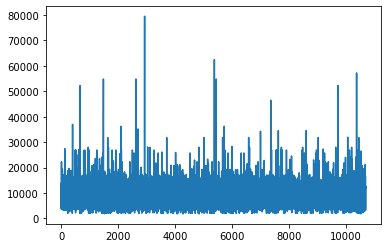

In [40]:
df['Price'].plot()

In [41]:
df['Price'].fillna(df['Price'].mean(),inplace=True)

In [42]:
df['Route_1'].fillna('None',inplace=True)
df['Route_2'].fillna('None',inplace=True)
df['Route_3'].fillna('None',inplace=True)
df['Route_4'].fillna('None',inplace=True)
df['Route_5'].fillna('None',inplace=True)

In [43]:
df['Duration_Hours']=df['Duration'].str.split('h').str[0]

In [44]:
df['Duration_Minutes']=df['Duration'].str.split('h').str[1]

In [45]:
df['Duration_Minutes']=df['Duration_Minutes'].str.split('m').str[0]

In [46]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,...,Arrival_Minutes,Dep_Hour,Dep_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,...,10,22,20,BLR,DEL,None,None,None,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,...,15,05,50,CCU,IXR,BBI,BLR,None,7,25
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,...,25,09,25,DEL,LKO,BOM,COK,None,19,
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,...,30,18,05,CCU,NAG,BLR,None,None,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,...,35,16,50,BLR,NAG,DEL,None,None,4,45


In [47]:
df['Duration_Minutes'].fillna('0',inplace=True)

In [48]:
df['Duration_Minutes']=df['Duration_Minutes'].replace('','0')

In [49]:
df['Duration_Minutes'].unique()

array([' 50', ' 25', '0', ' 45', ' 30', ' 5', ' 15', ' 35', ' 10', ' 20',
       ' 55', ' 40'], dtype=object)

In [50]:
df['Duration_Hours'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [51]:
df.dtypes

Airline              object
Source               object
Destination          object
Duration             object
Total_Stops          object
Additional_Info      object
Price               float64
Date                  int32
Month                 int32
Year                  int32
Arrival_Hour         object
Arrival_Minutes      object
Dep_Hour             object
Dep_Minutes          object
Route_1              object
Route_2              object
Route_3              object
Route_4              object
Route_5              object
Duration_Hours       object
Duration_Minutes     object
dtype: object

In [52]:
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)

In [53]:
df['Arrival_Minutes']=df['Arrival_Minutes'].astype(int)

In [54]:
df['Dep_Hour']=df['Dep_Hour'].astype(int)

In [55]:
df['Dep_Minutes']=df['Dep_Minutes'].astype(int)

In [56]:
df['Duration_Minutes']=df['Duration_Minutes'].astype(int)

In [57]:
df['Duration_Hours']=df['Duration_Hours'].replace('5m','5')

In [58]:
df['Duration_Hours']=df['Duration_Hours'].astype(int)

In [59]:
df.drop(['Duration'],axis=1,inplace=True)
df['Total_Stops']=df['Total_Stops'].astype(int)

In [60]:
df.dtypes

Airline              object
Source               object
Destination          object
Total_Stops           int32
Additional_Info      object
Price               float64
Date                  int32
Month                 int32
Year                  int32
Arrival_Hour          int32
Arrival_Minutes       int32
Dep_Hour              int32
Dep_Minutes           int32
Route_1              object
Route_2              object
Route_3              object
Route_4              object
Route_5              object
Duration_Hours        int32
Duration_Minutes      int32
dtype: object

In [61]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Arrival_Hour        0
Arrival_Minutes     0
Dep_Hour            0
Dep_Minutes         0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
Duration_Hours      0
Duration_Minutes    0
dtype: int64

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
encoder=LabelEncoder()
df['Airline']=encoder.fit_transform(df['Airline'])
df['Source']=encoder.fit_transform(df['Source'])
df['Destination']=encoder.fit_transform(df['Destination'])
df['Additional_Info']=encoder.fit_transform(df['Additional_Info'])
df['Route_1']=encoder.fit_transform(df['Route_1'])
df['Route_2']=encoder.fit_transform(df['Route_2'])
df['Route_3']=encoder.fit_transform(df['Route_3'])
df['Route_4']=encoder.fit_transform(df['Route_4'])
df['Route_5']=encoder.fit_transform(df['Route_5'])


In [64]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Dep_Hour,Dep_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_Hours,Duration_Minutes
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,0,13,24,12,4,2,50
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,2,25,1,3,4,7,25
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,3,32,4,5,4,19,0
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,2,34,3,12,4,5,25
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,0,34,8,12,4,4,45


# Feature Selection

In [65]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [66]:
df.shape

(13354, 20)

In [67]:
df_train=df[:10683]
df_test=df[10683:]

In [68]:
X=df_train.drop(['Price'],axis=1)
y=df_train.Price

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [70]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [71]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [72]:
selected_featues=X_train.columns[(model.get_support())]

In [73]:
selected_featues

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Arrival_Hour', 'Arrival_Minutes', 'Dep_Hour',
       'Dep_Minutes', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Duration_Hours', 'Duration_Minutes'],
      dtype='object')

In [74]:
X_train=X_train[['Airline','Source','Destination','Total_Stops', 'Additional_Info', 'Date', 'Month',
       'Arrival_Hour', 'Arrival_Minutes', 'Dep_Hour', 'Dep_Minutes', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Duration_Hours',
       'Duration_Minutes']]

In [75]:
X_test=X_test[['Airline','Source','Destination', 'Total_Stops', 'Additional_Info', 'Date', 'Month',
       'Arrival_Hour', 'Arrival_Minutes', 'Dep_Hour', 'Dep_Minutes', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Duration_Hours',
       'Duration_Minutes']]

# RandomForest Regressor

In [76]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [77]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [78]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [79]:
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [80]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   6.6s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   7.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   7.2s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   7.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   7.8s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   7.1s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  15.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  16.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  17.5s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  16.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  20.9s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   9.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.9s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.8s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.0s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=  14.3s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=  14.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   8.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   7.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   8.0s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   4.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   5.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   4.6s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   2.6s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   2.5s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   2.6s
[CV] n_estimators=900, min_samples_split=

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 27.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [81]:

y_pred=rf_random.predict(X_test)


C:\Users\vhshe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

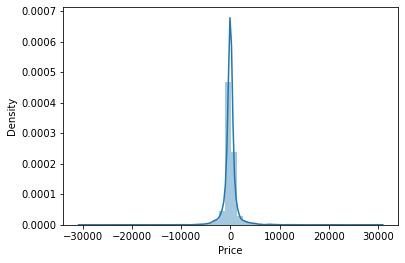

In [82]:
import seaborn as sns

sns.distplot(y_test-y_pred)

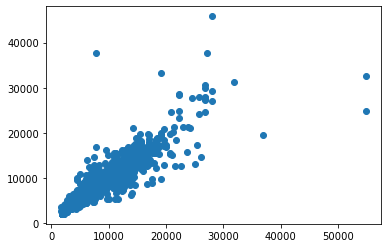

In [83]:
plt.scatter(y_test,y_pred)

In [85]:
# Import pickle Package

import pickle

In [86]:
# saving the model to the local file system
filename = 'FlightFarePred.pickle'
pickle.dump(rf_random, open(filename, 'wb'))

In [94]:
rf_random.predict(X_test)

array([ 6235.95975794,  3880.36048413, 11648.81100009, ...,
       11571.28205326, 14183.99826864,  7837.50099026])

In [95]:
y_test

9693      6171.0
9825      3873.0
7702     10991.0
1437     16757.0
6828      6316.0
          ...   
2294      7318.0
7085      4462.0
10331    11789.0
872      13941.0
6935      8040.0
Name: Price, Length: 3205, dtype: float64

In [ ]:
We can see that most is able 